In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('./final.csv',index_col=0)
df

,Name,Average Rating,Rating Count,Currency,Price,FBN,URL,Seller
0,BODY SCULPTURE Yoga Mat 17mm,5.0,1.0,EGP,799.00,Express,https://www.noon.com/egypt-en/yoga-mat-17mm/N5...,noon
1,Athlete Home Exercise Mat,4.0,1.0,EGP,280.00,Express,https://www.noon.com/egypt-en/exercise-mat/ZEB...,Athlete Home
2,Spurt 18D-141 Yoga Roller Pink 30cm,5.0,1.0,EGP,183.00,Express,https://www.noon.com/egypt-en/18d-141-yoga-rol...,noon
3,Athlete Home Power Pull High End Mat,NaN,NaN,EGP,360.00,Express,https://www.noon.com/egypt-en/power-pull-high-...,Athlete Home
4,Athlete Home Yoga Ball 2021 65cm,NaN,NaN,EGP,159.00,Express,https://www.noon.com/egypt-en/yoga-ball-2021-6...,Athlete Home
...,...,...,...,...,...,...,...,...
1245,Generic Anti Burst Yoga Ball Fitness Gym Exerc...,NaN,NaN,EGP,329.35,Market,https://www.noon.com/egypt-en/anti-burst-yoga-...,Souqegypt
1246,Generic Exercise Fitness Aerobic Ball For Gym ...,NaN,NaN,EGP,304.35,Market,https://www.noon.com/egypt-en/exercise-fitness...,Souqegypt
1247,Generic New Swiss Exercise Fitness Aerobic Bal...,NaN,NaN,EGP,345.00,Market,https://www.noon.com/egypt-en/new-swiss-exerci...,Souqegypt
1248,Generic Sports Gym Ball 55cm,NaN,NaN,EGP,342.50,Market,https://www.noon.com/egypt-en/sports-gym-ball-...,Souqegypt


Checking for duplicates

In [56]:
df.duplicated().sum()

711

Removing duplicates

In [57]:
df = df.drop_duplicates()

In [58]:
df.shape

(2499, 8)

Adding column for brand

Brand names were scrapped previously

In [59]:
df1 = df.copy()

In [60]:
brands = ['BODY SCULPTURE',
 'TA SPORT',
 'Generic',
 'Athlete Home',
 'Spurt',
 'Emfil',
 'SportQ',
 'UFIT']

In [61]:
def stat(df):
    if brands[0] in df['Name']:
        return brands[0]
    if brands[1] in df['Name']:
        return brands[1]
    if brands[2] in df['Name']:
        return brands[2]
    if brands[3] in df['Name']:
        return brands[3]
    if brands[4] in df['Name']:
        return brands[4]
    if brands[5] in df['Name']:
        return brands[5]
    if brands[6] in df['Name']:
        return brands[6]
    if brands[7] in df['Name']:
        return brands[7]
    else:
        return 'Generic'


In [62]:
df1['Brand Name'] = df.apply (lambda row: stat(row), axis=1)
print(df1['Brand Name'])

0      BODY SCULPTURE
1        Athlete Home
2               Spurt
3        Athlete Home
4        Athlete Home
            ...      
545           Generic
546           Generic
547           Generic
548           Generic
549           Generic
Name: Brand Name, Length: 2499, dtype: object


In [63]:
df1['Brand Name'].value_counts()

Generic           2383
Athlete Home        58
Spurt               21
Emfil               11
SportQ              10
BODY SCULPTURE       8
UFIT                 7
TA SPORT             1
Name: Brand Name, dtype: int64

***<h3>Some analysis</h3>***

a. Most expensive product

In [65]:
df1.reset_index(inplace = True, drop = True)

In [76]:
print('Product with highest price : %s ; costing : %s'%(df1['Name'].loc[df1['Price'].idxmax()],df['Price'].max()))

Product with highest price : JOINFIT Black Balance Ball ; costing : 3795.0


b. Cheapest Product

In [77]:
print('Product with lowest price : %s ; costing : %s'%(df1['Name'].loc[df1['Price'].idxmin()],df['Price'].min()))

Product with lowest price : Generic Anti-Burst Yoga Swiss Ball 25centimeter ; costing : 59.9


c. Number of Products from Each Brand 

In [80]:
df1.columns

Index(['Name', 'Average Rating', 'Rating Count', 'Currency', 'Price', 'FBN',
       'URL', 'Seller', 'Brand Name'],
      dtype='object')

In [79]:
df1['Brand Name'].value_counts()

Generic           2383
Athlete Home        58
Spurt               21
Emfil               11
SportQ              10
BODY SCULPTURE       8
UFIT                 7
TA SPORT             1
Name: Brand Name, dtype: int64

Visualized

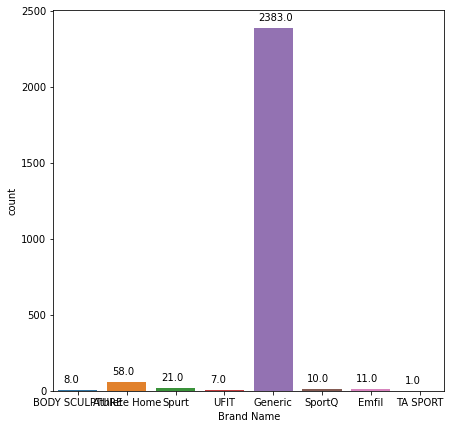

In [83]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Brand Name",data=df1)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

d. Number of Products by Each Seller

In [98]:
value_counts = df1['Seller'].value_counts()

df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Seller', 'Values'] 
df_value_counts

,Seller,Values
0,Souqegypt,1667
1,Kanteen.store,479
2,Alfayez sports,75
3,Athlete Home,61
4,Happy shopping,33
5,TBE,23
6,noon,20
7,Vision Technology,19
8,Bekstore,17
9,RED MOON,16


([<matplotlib.patches.Wedge at 0x203b8df30d0>,
 [Text(-0.5511971091768446, 0.9519357892395316, 'Souqegypt'),
  Text(0.08909629084886758, -1.0963858130042428, 'Kanteen.store'),
  Text(0.7716820604629189, -0.7839048396072729, 'Alfayez sports'),
  Text(0.8938039711803432, -0.6411820810832509, 'Athlete Home'),
  Text(0.9631635052250074, -0.5313342283371901, 'Happy shopping'),
  Text(0.998152658321586, -0.4622675315069744, 'TBE'),
  Text(1.0216712675284056, -0.4076614049758711, 'noon'),
  Text(1.0404225754483978, -0.3571006363720505, 'Vision Technology'),
  Text(1.0555130612110244, -0.30966462118384236, 'Bekstore'),
  Text(1.0674478358526636, -0.26562213336517204, 'RED MOON'),
  Text(1.0761345483430291, -0.22789127640729218, 'SOFT CARE'),
  Text(1.0822731180485627, -0.1966847679649901, 'AL Hayat'),
  Text(1.0868757353688736, -0.1694140958313991, 'Brenda Box'),
  Text(1.0898769688481669, -0.1488898679371173, 'Al Abd Sports'),
  Text(1.0919989748457928, -0.13243201627906212, 'Alpha'),
  Text(

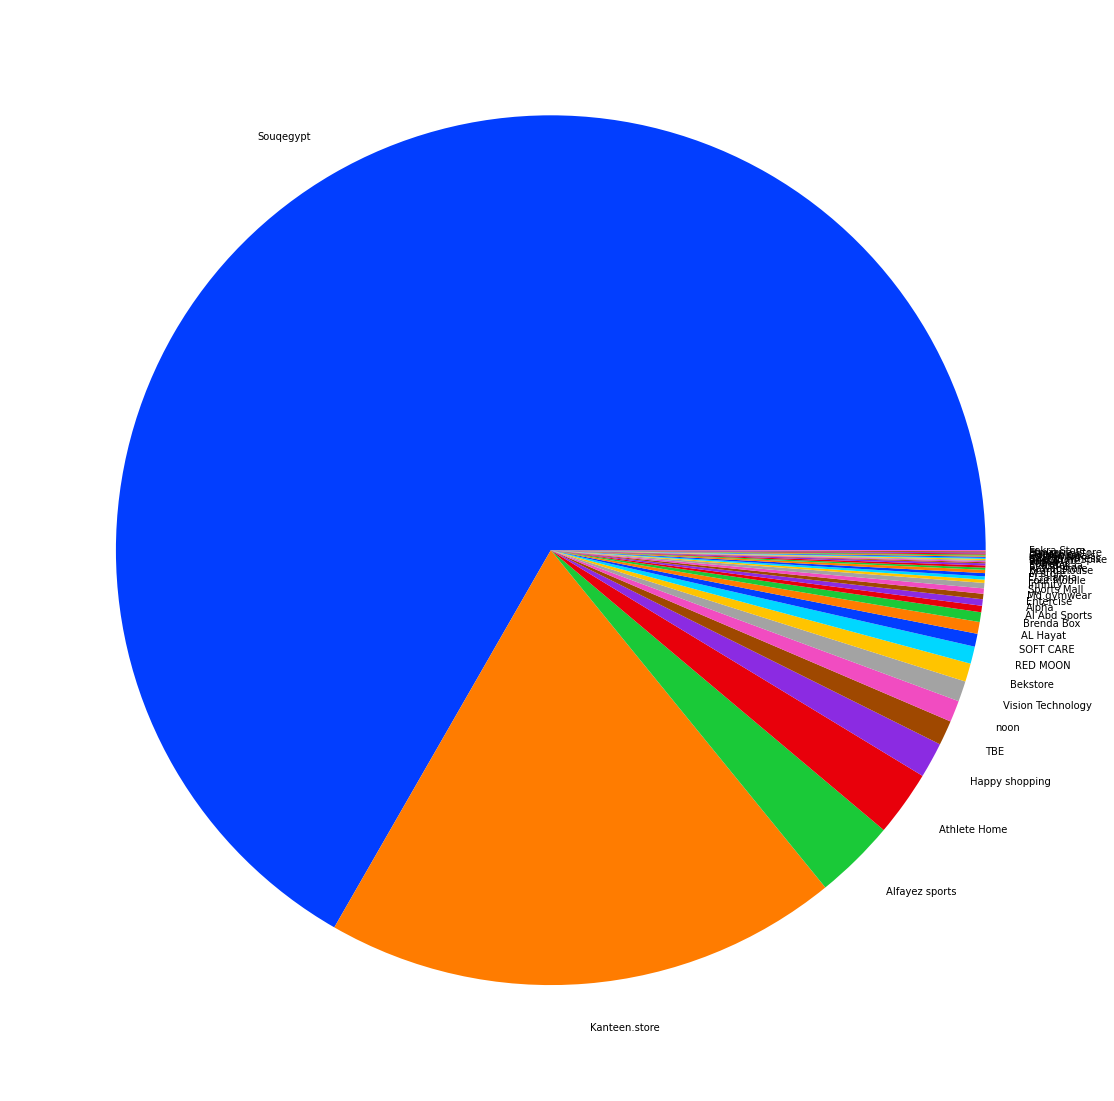

In [105]:
plt.figure(figsize=(20,20))
palette_color = sns.color_palette('bright')
plt.pie(df_value_counts['Values'], labels=df_value_counts["Seller"], colors=palette_color)

<h3>Scatter plot of price and ratings distribution</h3>

To do this first lets remove nulls for ratings 

In [69]:
df2 = df1.dropna(axis=0, subset=['Average Rating'])

In [70]:
df2

,Name,Average Rating,Rating Count,Currency,Price,FBN,URL,Seller,Brand Name
0,BODY SCULPTURE Yoga Mat 17mm,5.0,1.0,EGP,799.0,Express,https://www.noon.com/egypt-en/yoga-mat-17mm/N5...,noon,BODY SCULPTURE
1,Athlete Home Exercise Mat,4.0,1.0,EGP,280.0,Express,https://www.noon.com/egypt-en/exercise-mat/ZEB...,Athlete Home,Athlete Home
2,Spurt 18D-141 Yoga Roller Pink 30cm,5.0,1.0,EGP,183.0,Express,https://www.noon.com/egypt-en/18d-141-yoga-rol...,noon,Spurt
5,Athlete Home Yoga Ball 2021 55cm,5.0,1.0,EGP,149.0,Express,https://www.noon.com/egypt-en/yoga-ball-2021-5...,Athlete Home,Athlete Home
7,UFIT Yoga Mat With Carrying Strap & Bag- 10 Mm...,4.7,3.0,EGP,319.0,Market,https://www.noon.com/egypt-en/yoga-mat-with-ca...,Kanteen.store,UFIT
...,...,...,...,...,...,...,...,...,...
1580,Generic Exercise Swiss Ball - 65cm 65centimeter,4.9,8.0,EGP,375.0,Market,https://www.noon.com/egypt-en/exercise-swiss-b...,Souqegypt,Generic
1589,Generic Exercise Swiss Ball - 65cm 65centimeter,5.0,1.0,EGP,375.0,Market,https://www.noon.com/egypt-en/exercise-swiss-b...,Souqegypt,Generic
1626,Generic Aerobics Yoga Ball - 90 cm 90centimeter,5.0,1.0,EGP,300.0,Market,https://www.noon.com/egypt-en/aerobics-yoga-ba...,Souqegypt,Generic
2192,Generic Exercise Swiss Ball - 65cm 65centimeter,5.0,1.0,EGP,375.0,Market,https://www.noon.com/egypt-en/exercise-swiss-b...,Souqegypt,Generic


No clear correlation, but a higher number of products have good ratings

<AxesSubplot:xlabel='Average Rating', ylabel='Price'>

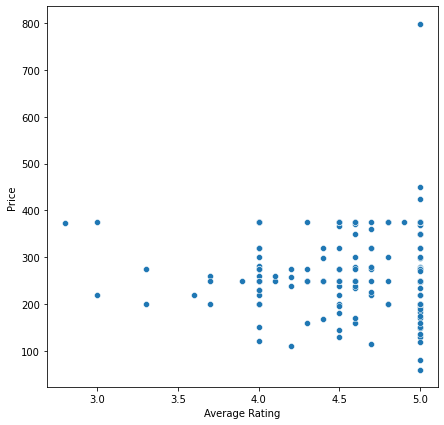

In [74]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Average Rating",
                    y="Price",
                    data=df2)